<a href="https://colab.research.google.com/github/arjun1131/Building-ML-models-from-Stratch/blob/main/Building_Linear_Regression_from_Stratch_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression


In [ ]:
#Importing Libraries
import numpy as np

In [ ]:
class Linear_Reg:
  #Initialization Hyper parameters of model
  def __init__(self, learning_rate, number_of_iterations):

    self.learning_rate = learning_rate
    self.iterations = number_of_iterations

  #Function used to fit datat within model
  def fit(self,x,y):

    #Getting number of training samples & number of features
    self.m , self.n = x.shape
    

    #Initialize model parameters
    self.weight = np.zeros(self.n)
    self.bias = 0
    self.x = x
    self.y = y

    #Implementing Gradient Descent algorithm for Optimization
    for i in range(self.iterations):
      self.update_parameters()

  #Function used to update parameters
  def update_parameters(self,):

    y_pred = self.predict(self.x)

    #Calculating Gradient Descent
    dw = -(2 * (self.x.T).dot(self.y - y_pred))/ self.m

    db = -(2 * np.sum(self.y - y_pred)) / self.m

    #Updating model parameters

    self.weight = self.weight - (self.learning_rate * dw)

    self.bias = self.bias - (self.learning_rate * db)

  #Predict function for 
  def predict(self,x): 
    return (x.dot(self.weight) + self.bias)


## Workflow of Linear Regression model

1.Set Learning Rate & Number of iterations<br>
2.Build linear regression equation **(y = wx + b)** <br>
3.Find the predicted value for given x value for corresponding weight & bias<br>
4.Check loss function for parameters (Difference btw actual value & Predicted value)<br>
5.Update parameters by using Gradient descent.<br>
6.Repeat steps 3,4,5 until we get minimum loss function.<br>




In [ ]:
#Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Processing

In [ ]:
#Loading CSV data into Pandas Dataframe
data = pd.read_csv('/content/drive/MyDrive/ML Datasets/salary_data.csv')

In [ ]:
#Checking data
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


Splitting feature & target

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [ ]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

Splitting data into train & test data

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x , y, test_size = 0.2 , random_state = 2)

In [ ]:
print(x_train.shape, x_test.shape , y_train.shape)

(24, 1) (6, 1) (24,)


Model Training

In [ ]:
#Creating instance of Linear Regression
reg = Linear_Reg(learning_rate = 0.02, number_of_iterations= 1500)

In [ ]:
reg.fit(x_train, y_train)

In [ ]:
#Printing model parameters

print ('Weight = ',reg.weight[0])
print ('Bias = ',reg.bias)

Weight =  9569.61308424041
Bias =  24392.985242661347


Predicting outut for train & test data

In [ ]:
train_prediction = reg.predict(x_train)
print(train_prediction)

[102863.81253343  53101.82449538  43532.21141114  89466.3542155
  52144.86318696 116261.27085137  62671.43757962  45446.13402799
  61714.4762712   73198.01197229 122960.00001034 110519.50300083
  75111.93458914  38747.40486902  55015.74711223 115304.30954295
 107648.61907555  80853.70243968  62671.43757962  99992.92860816
 124873.92262719  63628.39888805  71284.08935544  55015.74711223]


In [ ]:
test_prediction = reg.predict(x_test)
print(test_prediction)

[36833.48225217 34919.55963533 67456.24412174 59800.55365435
 92337.23814077 81810.6637481 ]


Visualizing prediction values vs actual values

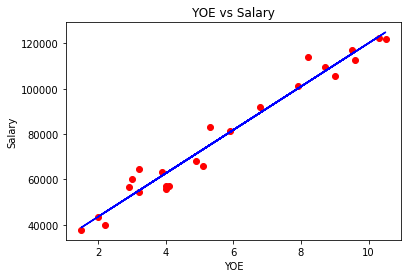

In [ ]:
plt.scatter(x_train , y_train , color = 'red')
plt.plot(x_train , train_prediction, color = 'blue')
plt.xlabel('YOE')
plt.ylabel('Salary')
plt.title('YOE vs Salary')
plt.show()

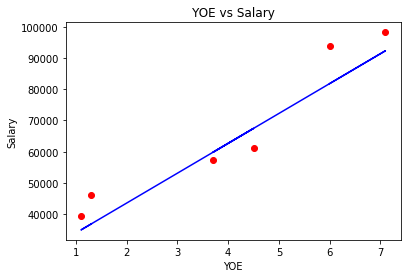

In [ ]:
plt.scatter(x_test , y_test , color = 'red')
plt.plot(x_test , test_prediction, color = 'blue')
plt.xlabel('YOE')
plt.ylabel('Salary')
plt.title('YOE vs Salary')
plt.show()